In [1]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

In [3]:
@app.route('/', methods=['GET', 'POST'])
def home():
    if request.method == 'POST':
        ticker = request.form['ticker']
        stock_data = yf.download(ticker, start="2020-01-01", end="2024-01-01")
        stock_data['Close'] = stock_data['Close'].fillna(method='ffill')
        ts_data = stock_data['Close'].values.reshape(-1, 1)
        scaler = MinMaxScaler()
        ts_data_normalized = scaler.fit_transform(ts_data)
        look_back = 360
        X, y = [], []
        for i in range(len(ts_data_normalized) - look_back - 1):
            X.append(ts_data_normalized[i:(i + look_back), 0])
            y.append(ts_data_normalized[i + look_back, 0])
        X, y = np.array(X), np.array(y)
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))
        model = Sequential()
        model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
        model.add(LSTM(units=50))
        model.add(Dense(units=1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X, y, epochs=2, batch_size=32)
        future_periods = 30
        future_predictions_normalized = []
        x_input = ts_data_normalized[-look_back:]
        for i in range(future_periods):
            x_input_reshaped = x_input.reshape((1, look_back, 1))
            future_prediction_normalized = model.predict(x_input_reshaped)[0, 0]
            future_predictions_normalized.append(future_prediction_normalized)
            x_input = np.append(x_input[1:], future_prediction_normalized)
        future_predictions = scaler.inverse_transform(
            np.array(future_predictions_normalized).reshape(-1, 1)).flatten()
        last_date = stock_data.index[-1]
        future_dates = pd.date_range(start=last_date, periods=future_periods + 1, freq='D')[1:]
        plt.figure(figsize=(12, 6))
        plt.plot(stock_data.index[-60:], stock_data['Close'][-60:], label='Actual', color='blue')
        plt.plot(future_dates, future_predictions, label='Predicted', color='red')
        plt.title(f"Stock Price Prediction for {ticker}")
        plt.xlabel("Date")
        plt.ylabel("Stock Price")
        plt.legend()
        plt.savefig('static/plot.png')
        return render_template('./index.html', plot='plot.png')
    return render_template('./index.html', plot_image=None)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [14/Apr/2024 12:54:04] "GET / HTTP/1.1" 200 -
Exception in thread Thread-5:
Traceback (most recent call last):
  File "C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site

Epoch 1/2
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - loss: 0.2029
Epoch 2/2
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - loss: 0.0100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

127.0.0.1 - - [14/Apr/2024 12:54:39] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2024 12:54:39] "GET /static/plot.png HTTP/1.1" 200 -
[*********************100%%**********************]  1 of 1 completed
C:\Users\konak\AppData\Local\Temp\ipykernel_16692\2939920716.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data['Close'] = stock_data['Close'].fillna(method='ffill')
C:\Users\konak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 287ms/step - loss: 0.1538
Epoch 2/2
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step - loss: 0.0127
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

127.0.0.1 - - [14/Apr/2024 12:55:27] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [14/Apr/2024 12:55:27] "GET /static/plot.png HTTP/1.1" 200 -


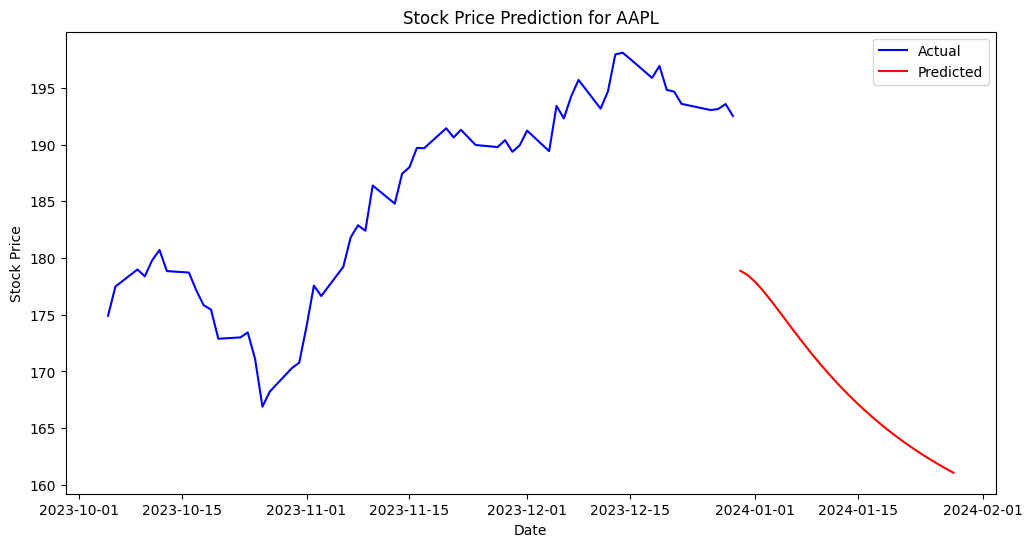

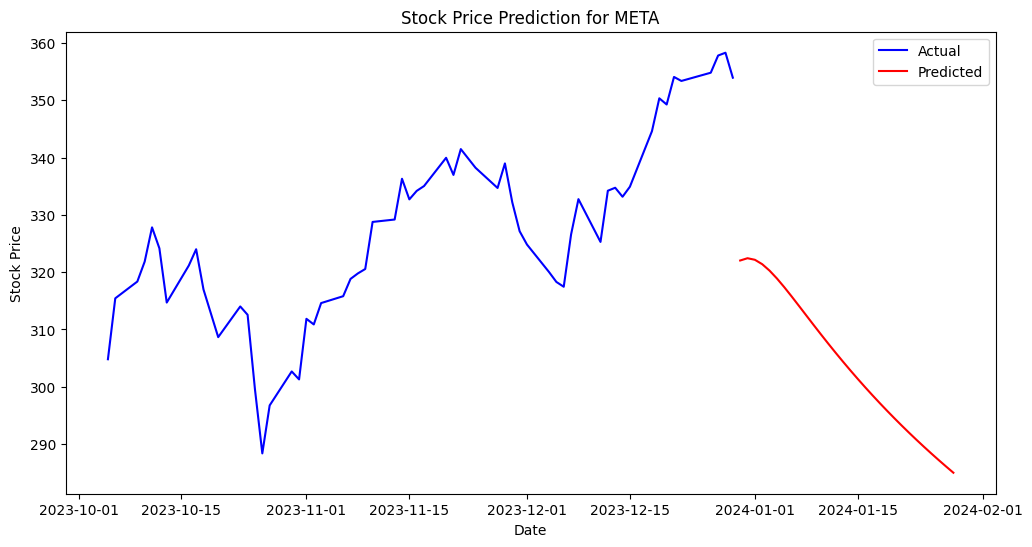

In [4]:
if __name__ == '__main__':
    app.run()